In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

df=pd.read_csv('USGas.csv', header=None)
df.shape


(238, 1)

<AxesSubplot:>

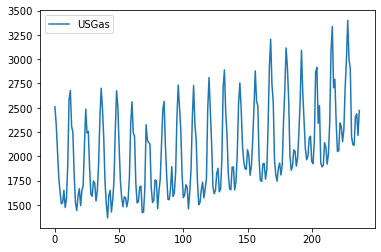

In [2]:

df.rename(columns={0: "USGas"}, inplace=True)
df.plot()
#The plot reveals the data contains info about volume of gas sold in consecutive months


In [3]:
noTrendnoSeasonal = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    use_boxcox=False,
    initialization_method="estimated",
).fit()
TrendnoSeasonal = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=False,
    initialization_method="estimated",
).fit()
noTrendSeasonal = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
TrendSeasonal = ExponentialSmoothing(
    df,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

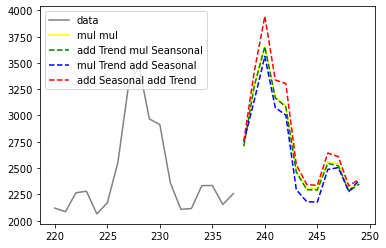

In [4]:
noTrendnoSeasonal.fittedvalues.iloc[220:].plot(style="-", color="gray", label="data")
noTrendnoSeasonal.forecast(12).plot(style="-", color="yellow",label="mul mul")
TrendnoSeasonal.forecast(12).plot(style="--", color="green",label="add Trend mul Seansonal")
noTrendSeasonal.forecast(12).plot(style="--", color="blue",label="mul Trend add Seasonal")
TrendSeasonal.forecast(12).plot(style="--", color="red",label="add Seasonal add Trend")
plt.legend()